# **In the name of Allah**

### **Hadi_Alizadeh**
---
HW2 _ CNN

## Load dataset

In [ ]:
# https://github.com/ujaitley/Convolutional-Neural-Network--17-Flower-Category-Classification/blob/master/CNN_Image_Classification.ipynb

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # for file editing
import shutil # for console commands
#print(os.listdir("../input"))

In [2]:
# if you are using Kaggle, make sure to turn on internet connection and GPU
import tarfile
import urllib
# this snippet of code is modified for our use case with additional comments, original source code:
# https://github.com/tflearn/tflearn/blob/master/tflearn/datasets/cifar10.py
def download(filename, source_url, work_directory):
    if not os.path.exists(work_directory): #check if the folder exists; if not make dir
        os.mkdir(work_directory)
    filepath = os.path.join(work_directory, filename)
    if not os.path.exists(filepath): # check if file exists; if not, download
        print("Downloading file, Please wait...")
        filepath, _ = urllib.request.urlretrieve(source_url + filename, # this is a function to download files
                                                 filepath)
        statinfo = os.stat(filepath)
        print(('Succesfully downloaded', filename, statinfo.st_size, 'bytes.'))
        untar(filepath,work_directory)
    return filepath

In [3]:
#only extract jpg files
def jpg_files(members):
    for tarinfo in members:
        if os.path.splitext(tarinfo.name)[1] == ".jpg":
            yield tarinfo

# extract function
def untar(fname,path="17category-flowers-py"): #untarring the archive
    tar = tarfile.open(fname)
    tar.extractall(path="17category-flowers-py", members=jpg_files(tar))
    tar.close()
    if path is "":
        print("File Extracted in Current Directory")
    else:
        print("File Extracted in to ",  path)

download("17flowers.tgz", "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/","17category-flowers-py")



<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-3-9b2330ecaac9>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if path is "":


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted in to  17category-flowers-py


'17category-flowers-py/17flowers.tgz'

In [4]:
os.listdir("/content/17category-flowers-py/") #jpg folder should be available

['17flowers.tgz', 'jpg']

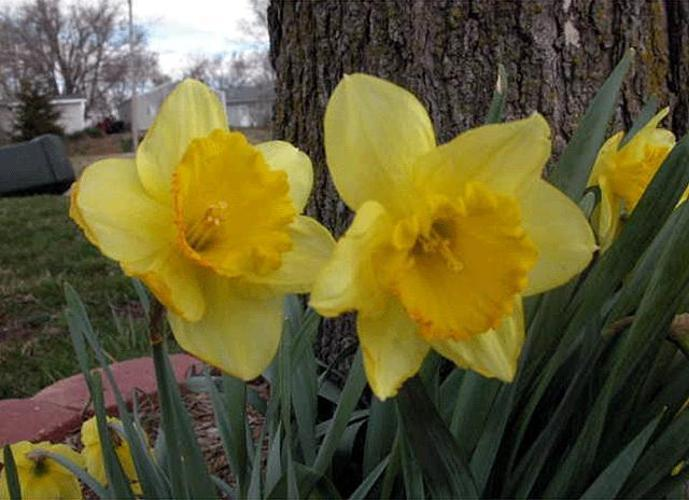

In [6]:
from PIL import Image #show one example of image
Image.open("/content/17category-flowers-py/jpg/image_0001.jpg")

In [7]:
#load images as np arrays
def load_data(fpath):
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

#all images are loaded as np arrays
images=[]
labels=[]
total=1361
j=1
for i in range(1, total):
    fname="/content/17category-flowers-py/jpg/image_"
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    images.append(load_data(fpath))
    labels.append(j) #labels are created as well
    if i%80==0: j+=1

images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)
images.shape




(1360, 224, 224, 3)

In [8]:
# split data into training and test
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.8, random_state =  104)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


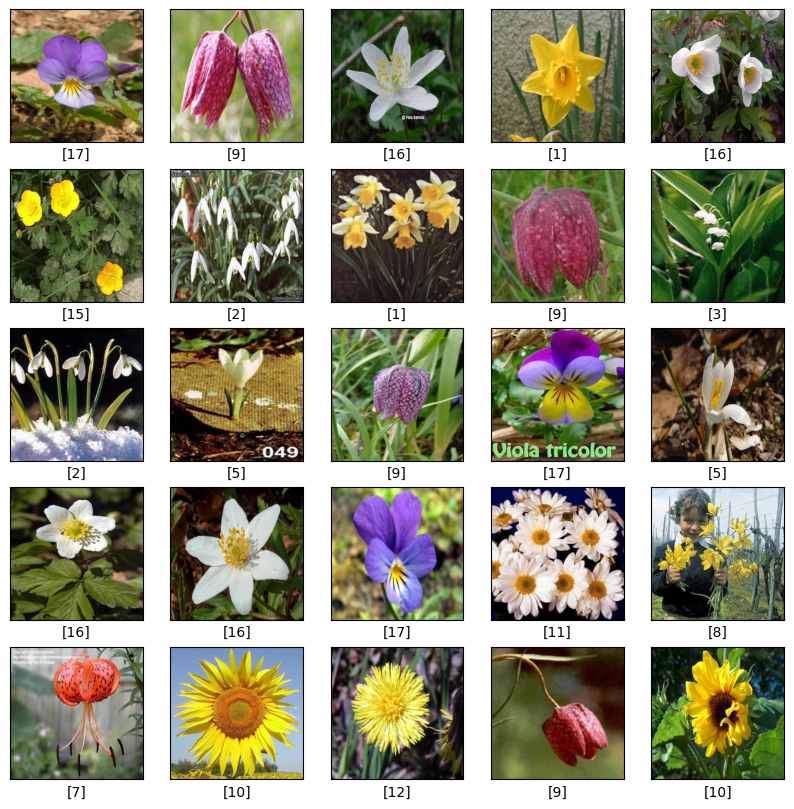

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255, cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [10]:
# dividing images into train and test folders by creating images from arrays
import cv2
import numpy as np
def create_images(data, labels, folder):
    dirname=folder

    if not os.path.exists(dirname): #check if the folder exists; if not make dir
      os.mkdir(dirname)
    n=0

    for i in data:
      label_n=labels[n][0]
      subfolder = folder + "/" + str(label_n)
      if not os.path.exists(subfolder): # create subfolders with categories
          os.mkdir(subfolder)
      filepath =  subfolder + "/" + str(n)+ ".jpg"
      cv2.imwrite(filepath, data[n]) #save image to corresponding subfolders
      n+=1

In [11]:
create_images(train_images, train_labels, 'train') #save image to corresponding subfolders
create_images(test_images, test_labels, 'test')

In [12]:
train_dir =os.path.realpath('/content/train')
validation_dir = os.path.realpath('/content/test')
image_size = 224

In [13]:
# use vgg16 pre-trained model with trainable densely connected output layer

from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers except for the last layer:
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation='softmax'))
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 17)                17425     
                                                                 
Total params: 40423249 (154.20 MB)
Trainable params: 32787985 (125.08 MB)
Non-trainable params: 7635264 (29.13 MB)
________

In [14]:
# image augmentation for train set and image resizing for validation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( # this function will generate augmented images in real time
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255) # for validation we don't need to augment

train_batchsize = 100
val_batchsize = 10

train_generator = train_datagen.flow_from_directory( # this function takes images from folders and feeds to Imagedatagenerator
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-4), # learning rate should be small so previously learned weights don't vanish
              metrics=['acc', 'top_k_categorical_accuracy'])



In [17]:
# train the model with augmented images in real-time
# make sure your GPU is available, otherwise training can take longer
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=0)

print('training acc.:',history.history['acc'][-1],'\n','test acc.:', (history.history['val_acc'])[-1])



<ipython-input-17-6866117a8b6d>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


training acc.: 0.9954044222831726 
 test acc.: 0.9522058963775635


In [18]:
print(' training top 5:',history.history['top_k_categorical_accuracy'][-1], '\n',
      'val top 5:', history.history['val_top_k_categorical_accuracy'][-1], '\n')

 training top 5: 1.0 
 val top 5: 0.9963235259056091 



## Test the model


In [27]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import load_model

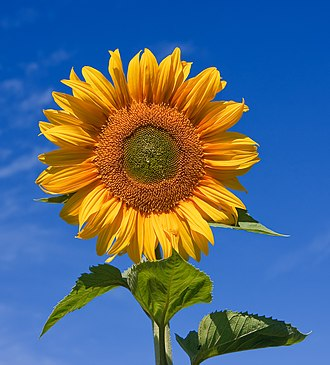

In [25]:
from PIL import Image
Image.open("/content/sunflower.jpg")

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the image
image_path = '/content/sunflower.jpg'  # Path to the input image
image = cv2.imread(image_path)

# Resize the image to match the expected input shape of the model
input_shape = (224, 224)  # Assuming the model expects input shape of (224, 224)
resized_image = cv2.resize(image, input_shape)

# Convert the resized image to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Flatten the grayscale image to shape (1, 25088)
flattened_image = gray_image.flatten().reshape(1, -1)[:,:25088]

features = vgg_model.predict(flattened_image)
